In [73]:
import cv2
import numpy as np
import xlsxwriter as xls
from skimage.feature import greycomatrix, greycoprops
import math
from scipy import stats
import matplotlib.pyplot as plt


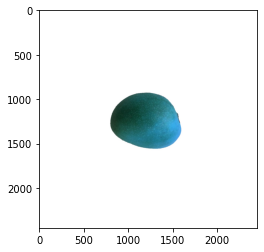

In [74]:
fitur_glcm = ['correlation','homogeneity', 'dissimilarity', 'contrast','energy','ASM']
angle = ['0','45','90','135']
fitur_bentuk = ['metric','eccentricity']
fitur_hsv = ['hue','saturation','values']

file_name = cv2.imread('dataset/Aafush1.jpg')
plt.imshow(file_name)

In [75]:
grayscale= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)                     #rubah dalam grayscale
ret, img1= cv2.threshold(grayscale,129,255,cv2.THRESH_BINARY_INV)    #melakukan tresholding
img1= cv2.dilate(img1.copy(),None,iterations=5)                 #menutup lubang pada citra
img1= cv2.erode(img1.copy(),None,iterations=5)                  #mengikis pingiran mangga hasil dari dilasi
b,g,r= cv2.split(img)
rgba= [b,g,r, img1]
dst= cv2.merge(rgba,4)

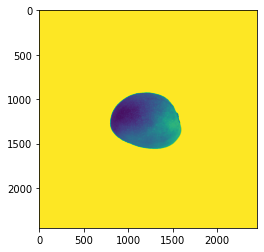

In [76]:
plt.imshow(grayscale)


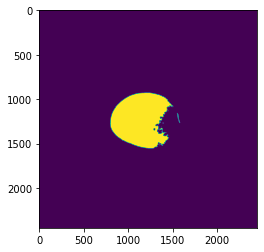

In [77]:
plt.imshow(img1)

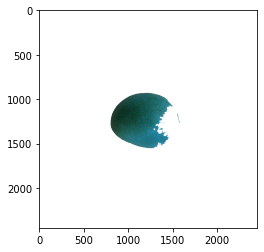

In [78]:
plt.imshow(dst)

In [79]:
contours, hierarchy = cv2.findContours(img1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
selected            = max(contours,key=cv2.contourArea)         #menentukan kontur terbesar dari citra
x,y,w,h             = cv2.boundingRect(selected)
png                 = dst[y:y+h,x:x+w]
gray = cv2.cvtColor(png, cv2.COLOR_BGR2GRAY)

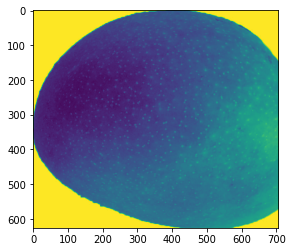

In [80]:
plt.imshow(gray)

In [85]:
distances = [5]
angles   = [0,np.pi/4,np.pi/2,3*np.pi/4]
levels   = 256
symmetric=True
normed   =True

glcm = greycomatrix(gray, distances, angles, levels, symmetric, normed)
glcm_props = [propery for name in fitur_glcm for propery in greycoprops(glcm, name)[0]]


In [89]:
glcm_props

[0.9774320400890869,
 0.9684395972492315,
 0.9695721141915379,
 0.9692661991142885,
 0.3505927427950362,
 0.33293974337315646,
 0.3392308280899622,
 0.3365346990241309,
 5.296481976911121,
 5.985807660244958,
 6.0030016468001355,
 6.011251729097391,
 197.49814732946558,
 272.7700529493133,
 264.41376195754793,
 265.6259034820127,
 0.14530345000327197,
 0.1413971691770339,
 0.14302321542117646,
 0.14116867396766355,
 0.021113092582853356,
 0.019993159451278743,
 0.020455640149412247,
 0.01992859450978849]

In [95]:
dimensions  = png.shape
height      = png.shape[0]
width       = png.shape[1]
mayor       = max(height,width)
minor       = min(height,width)
eccentricity = math.sqrt(1-((minor*minor)/(mayor*mayor)))

#metric
height1       = img.shape[0]
width1        = img.shape[1]
edge          = cv2.Canny(img,100,200)

k=0
keliling=1
while k<height1:
    l=0
    while l<width1:
        if edge[k,1]==255:
            keliling=keliling+1
        l=l+1
    k=k+1
k=0
luas=1
while k<height1:
    l=0
    while l<width1:
        if img1[k,1]==255:
            luas=luas+1
        l=l+1
    k=k+1
            
metric = (4*math.pi*luas)/(keliling*keliling)
shape_props=[eccentricity,metric]

In [99]:
shape_props

[0.46237293514114824, 12.566370614359172]

In [101]:
hsv = cv2.cvtColor(png, cv2.COLOR_BGR2HSV)
height=png.shape[0]
width=png.shape[1]
H=hsv[:,:,0]
S=hsv[:,:,1]
V=hsv[:,:,2]

hue = np.reshape(H,(1,height*width))
mode_h = stats.mode(hue[0])
if int(mode_h[0])==0:
    mode_hue = np.mean(H)
else:
    mode_hue = int(mode_h[0])
mean_s = np.mean(S)
mean_v = np.mean(V)
color_props=[mode_hue,mean_s,mean_v]

In [102]:
color_props

[26.70376689082171, 145.6711007430604, 137.2370145444343]